In [14]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import matplotlib.image as im
import os
from skimage import io
from scipy import ndimage
img = io.imread(os.path.join("lena_cover.jpg"), as_grey=True)
filt1 = 1/16*np.array([[1, 2, 1],[2, 4, 2],[1, 2, 1]], dtype = 'float32')
filt2 = 1/5*np.array([[0, 1, 0],[1, 1, 1],[0, 1, 0]], dtype = 'float32')
filt4 = np.array([[-1, -2, -1],[-2, 12, -2],[-1, -2, -1]], dtype = 'float32')
filt5 = np.array([[-1, -2, -1],[0, 0, 0],[1, 2, 1]], dtype = 'float32')


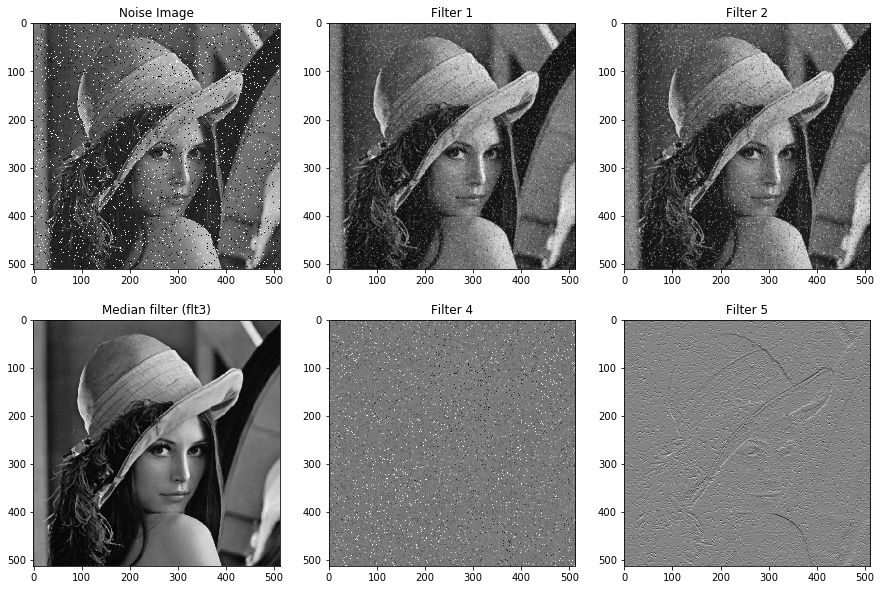

In [16]:
out = skimage.util.random_noise(img, mode='s&p', seed=None, clip=True)
flt1 = ndimage.convolve(out, filt1, mode='reflect', cval=0.0)
flt2 = ndimage.convolve(out, filt2, mode='reflect', cval=0.0)
flt3 = ndimage.median_filter(img, 3)
flt4 = ndimage.convolve(out, filt4, mode='reflect', cval=0.0)
flt5 = ndimage.convolve(out, filt5, mode='reflect', cval=0.0)

fig = plt.figure(figsize=(15,10))
plt.subplot(231)
plt.imshow(out, cmap='gray')
plt.title('Noise Image')
plt.subplot(232)
plt.imshow(flt1, cmap='gray')
plt.title('Filter 1')
plt.subplot(233)
plt.imshow(flt2, cmap='gray')
plt.title('Filter 2')
plt.subplot(234)
plt.imshow(flt3, cmap='gray')
plt.title('Median filter (flt3)')
plt.subplot(235)
plt.imshow(flt4, cmap='gray')
plt.title('Filter 4')
plt.subplot(236)
plt.imshow(flt5, cmap='gray')
plt.title('Filter 5')
plt.show()

In [ ]:
# 1. corresponds to a low-pass filter in the frequency domain
# Low pass filters add some blur to images, so Filter 1 and Filter 2 correspond better

# 2. less than the other specified noise-canceling filters, blurs edges
# Filter 1, Filter 2 and Median filter

# 3. increases the sharpness of the image
# None of these filters really sharpenned any edges

# 4. works slower than the other specified noise-canceling filters
# It might be a Median filter, cause it must process every entry in the signal
# for large signals such as images, the efficiency of this median calculation is
# a critical factor in determining how fast the algorithm can run. 
# Only the sorting takes the best time of O(n*logn)

# 5. is not a noise canceling filter
# As results show, Filter 4 and Filter 5 are not to be used as noise-cancelling filters

# 6. poorly removes noise such as "salt and pepper"
# Filter 4 highlights the edges & borders of images, hence the
# salt-and-pepper produced random pixels would be highlighted on the image

# 7. will destroy all lines of one pixel thickness in the image
# It might be a Filter 4